In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import glob

import da_func

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
루트경로 = '../'

데이터경로 = 루트경로 + 'data/'

---
# 0. 데이터 로드

In [3]:
glob.glob(데이터경로 + '*')

['../data/test.csv', '../data/train.csv', '../data/sample_submission.csv']

In [4]:
train_df = pd.read_csv(데이터경로 + 'train.csv')
test_df = pd.read_csv(데이터경로 + 'test.csv')

In [5]:
print(train_df.shape)
train_df.head()

(600000, 25)


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [6]:
train_df.target.value_counts()

0    487677
1    112323
Name: target, dtype: int64

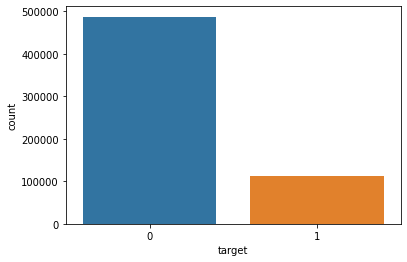

In [7]:
sns.countplot(train_df['target'])
plt.show()

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

----
### bin 컬럼

In [9]:
bin_cols = train_df.columns[train_df.columns.str.contains('bin')]
print(bin_cols)
train_df.loc[:, bin_cols]

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'], dtype='object')


,bin_0,bin_1,bin_2,bin_3,bin_4
0,0.0,0.0,0.0,F,N
1,1.0,1.0,0.0,F,Y
2,0.0,1.0,0.0,F,N
3,NaN,0.0,0.0,F,N
4,0.0,NaN,0.0,T,N
...,...,...,...,...,...
599995,0.0,1.0,0.0,T,N
599996,1.0,0.0,0.0,T,Y
599997,0.0,0.0,0.0,F,Y
599998,1.0,1.0,0.0,F,Y


In [10]:
for c in bin_cols:
    print(train_df[c].value_counts(dropna=False))

0.0    528377
1.0     53729
NaN     17894
Name: bin_0, dtype: int64
0.0    474018
1.0    107979
NaN     18003
Name: bin_1, dtype: int64
0.0    419845
1.0    162225
NaN     17930
Name: bin_2, dtype: int64
F      366212
T      215774
NaN     18014
Name: bin_3, dtype: int64
N      312344
Y      269609
NaN     18047
Name: bin_4, dtype: int64


In [75]:
train_df['bin_0'].value_counts(dropna=False)[]

528377

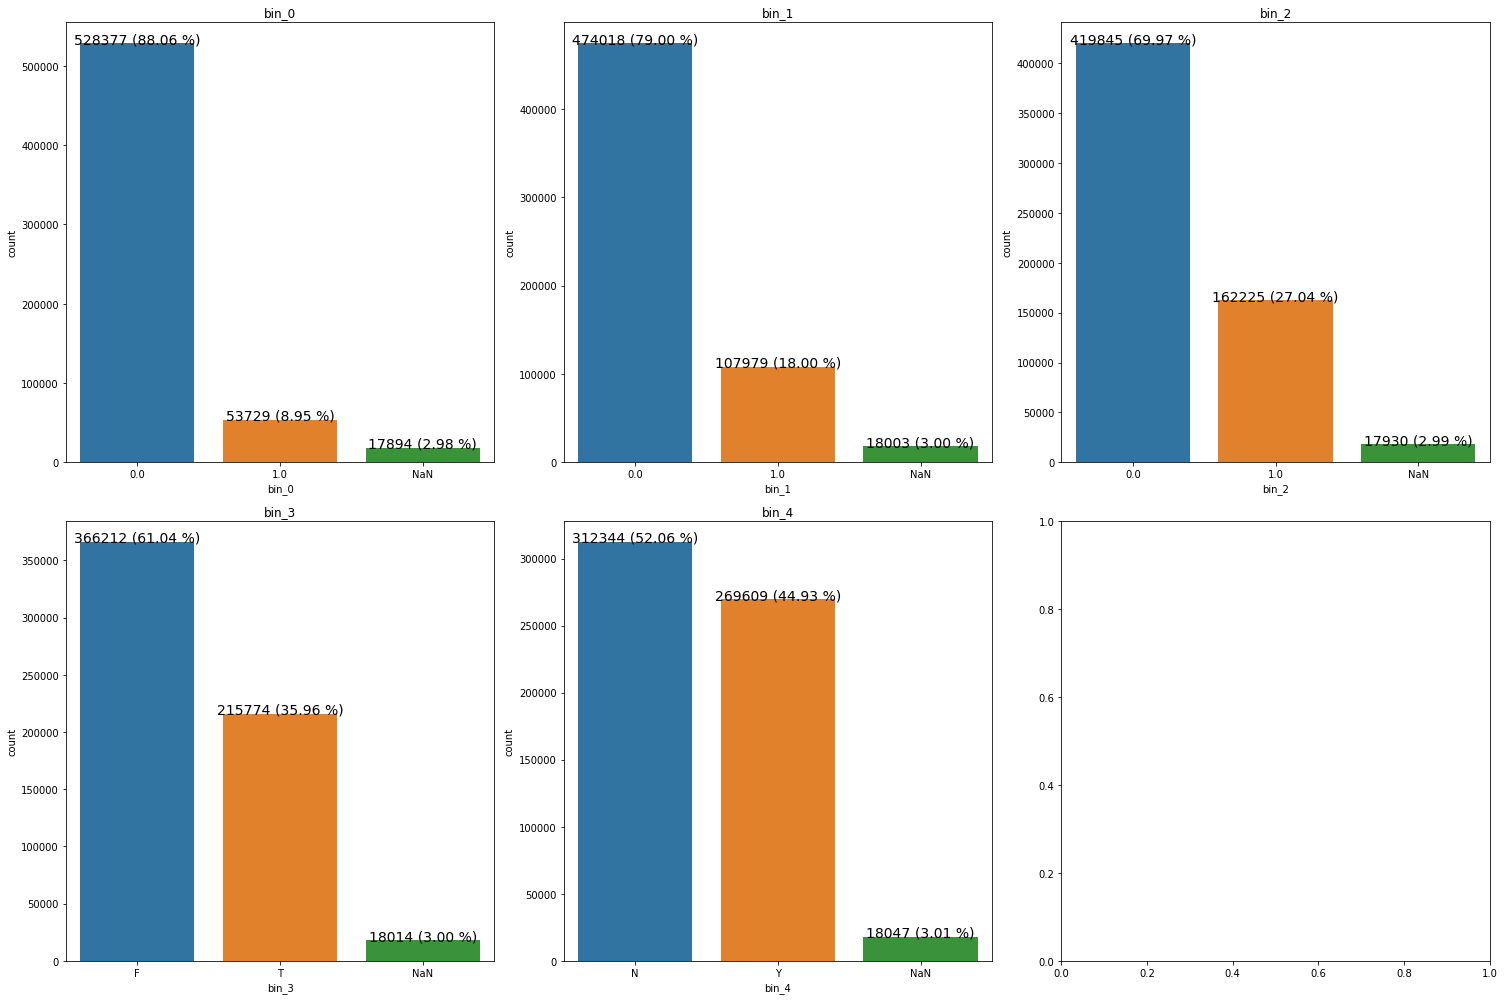

In [140]:
da_func.countplot_cols(train_df, bin_cols, ncols=3, dropna=False)

---
### nom 컬럼
1) low cardinality
2) high cardinality

In [143]:
nom_cols = train_df.columns[train_df.columns.str.contains('nom')]
nom_l = nom_cols[:5]
nom_h = nom_cols[5:]
print(nom_l)
display(train_df.loc[:, nom_l])
print(nom_h)
display(train_df.loc[:, nom_h])

Index(['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'], dtype='object')


,nom_0,nom_1,nom_2,nom_3,nom_4
0,Red,Trapezoid,Hamster,Russia,Bassoon
1,Red,Star,Axolotl,NaN,Theremin
2,Red,NaN,Hamster,Canada,Bassoon
3,Red,Circle,Hamster,Finland,Theremin
4,Red,Triangle,Hamster,Costa Rica,NaN
...,...,...,...,...,...
599995,Red,Polygon,Axolotl,India,Theremin
599996,Blue,Polygon,Dog,Costa Rica,Oboe
599997,Red,Circle,Axolotl,Russia,Theremin
599998,NaN,Polygon,Axolotl,NaN,Piano


Index(['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], dtype='object')


,nom_5,nom_6,nom_7,nom_8,nom_9
0,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990
1,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af
2,b574c9841,708248125,5ddc9a726,745b909d1,NaN
3,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57
4,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c
...,...,...,...,...,...
599995,014770cf0,da5014b01,a7059911d,158183c63,015c63324
599996,NaN,2023ed4ed,83bdea3a5,e9fde8fa8,a02ae6a63
599997,c7dc5d460,5d7d341ac,114b1dbf3,cccbca824,40f9610c1
599998,4d7780407,209e1054e,fba315672,4164322bd,c1a8374a0


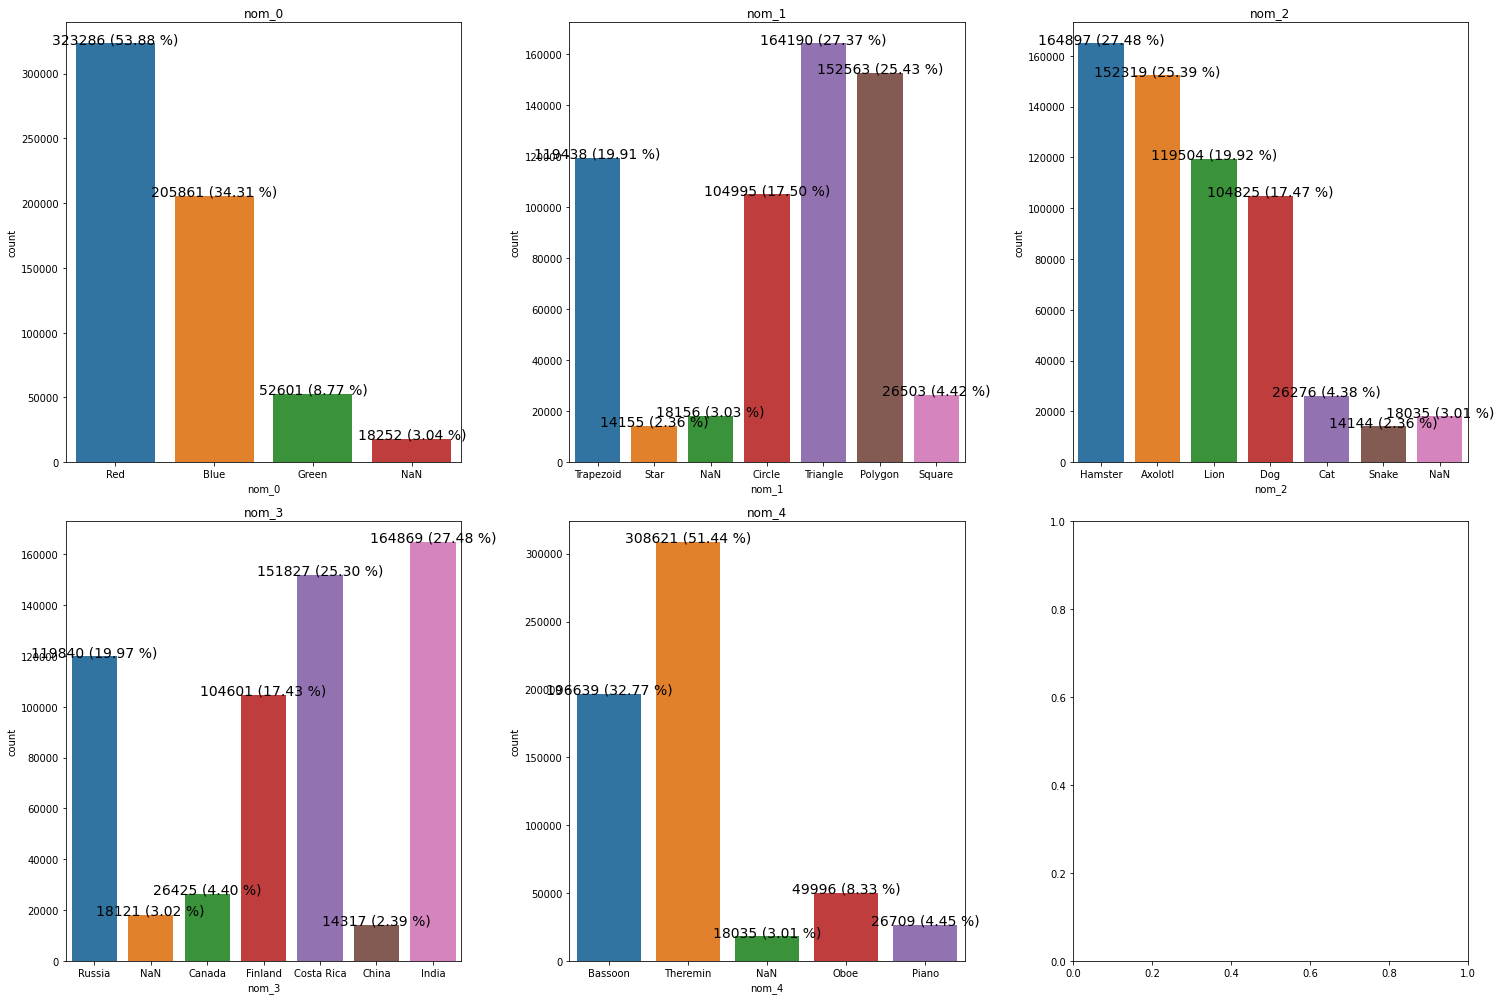

In [144]:
da_func.countplot_cols(train_df, nom_l, ncols=3, dropna=False)

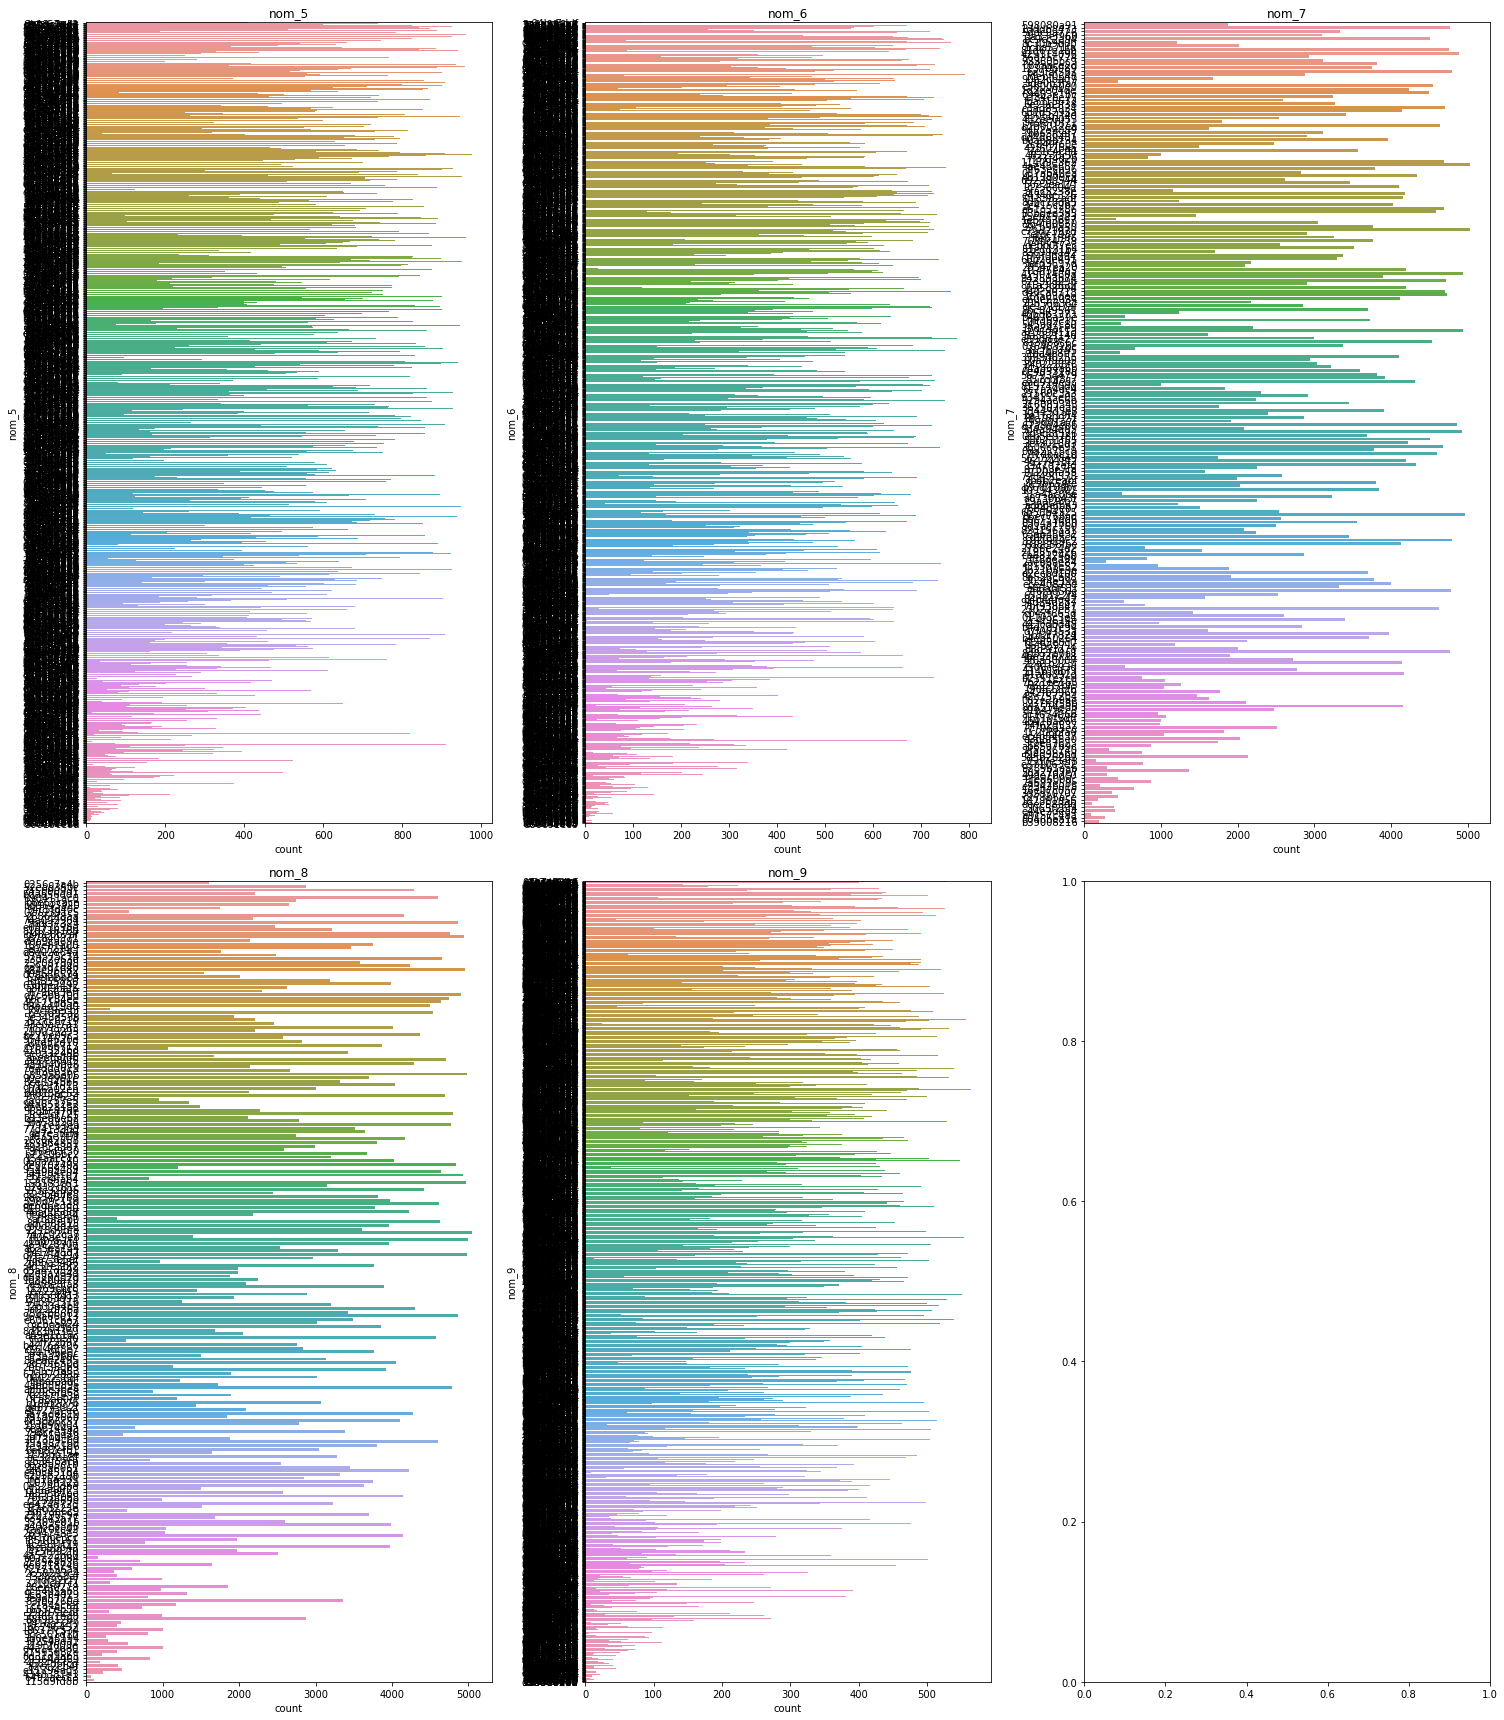

In [150]:
da_func.countplot_cols_hc(train_df, nom_h, ncols=3)

---
# ord

In [151]:
ord_cols = train_df.columns[train_df.columns.str.contains('ord')]
ord_l = nom_cols[:3]
ord_h = nom_cols[3:]
print(ord_l)
display(train_df.loc[:, ord_l])
print(ord_h)
display(train_df.loc[:, ord_h])

Index(['nom_0', 'nom_1', 'nom_2'], dtype='object')


,nom_0,nom_1,nom_2
0,Red,Trapezoid,Hamster
1,Red,Star,Axolotl
2,Red,NaN,Hamster
3,Red,Circle,Hamster
4,Red,Triangle,Hamster
...,...,...,...
599995,Red,Polygon,Axolotl
599996,Blue,Polygon,Dog
599997,Red,Circle,Axolotl
599998,NaN,Polygon,Axolotl


Index(['nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], dtype='object')


,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9
0,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990
1,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af
2,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN
3,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57
4,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c
...,...,...,...,...,...,...,...
599995,India,Theremin,014770cf0,da5014b01,a7059911d,158183c63,015c63324
599996,Costa Rica,Oboe,NaN,2023ed4ed,83bdea3a5,e9fde8fa8,a02ae6a63
599997,Russia,Theremin,c7dc5d460,5d7d341ac,114b1dbf3,cccbca824,40f9610c1
599998,NaN,Piano,4d7780407,209e1054e,fba315672,4164322bd,c1a8374a0


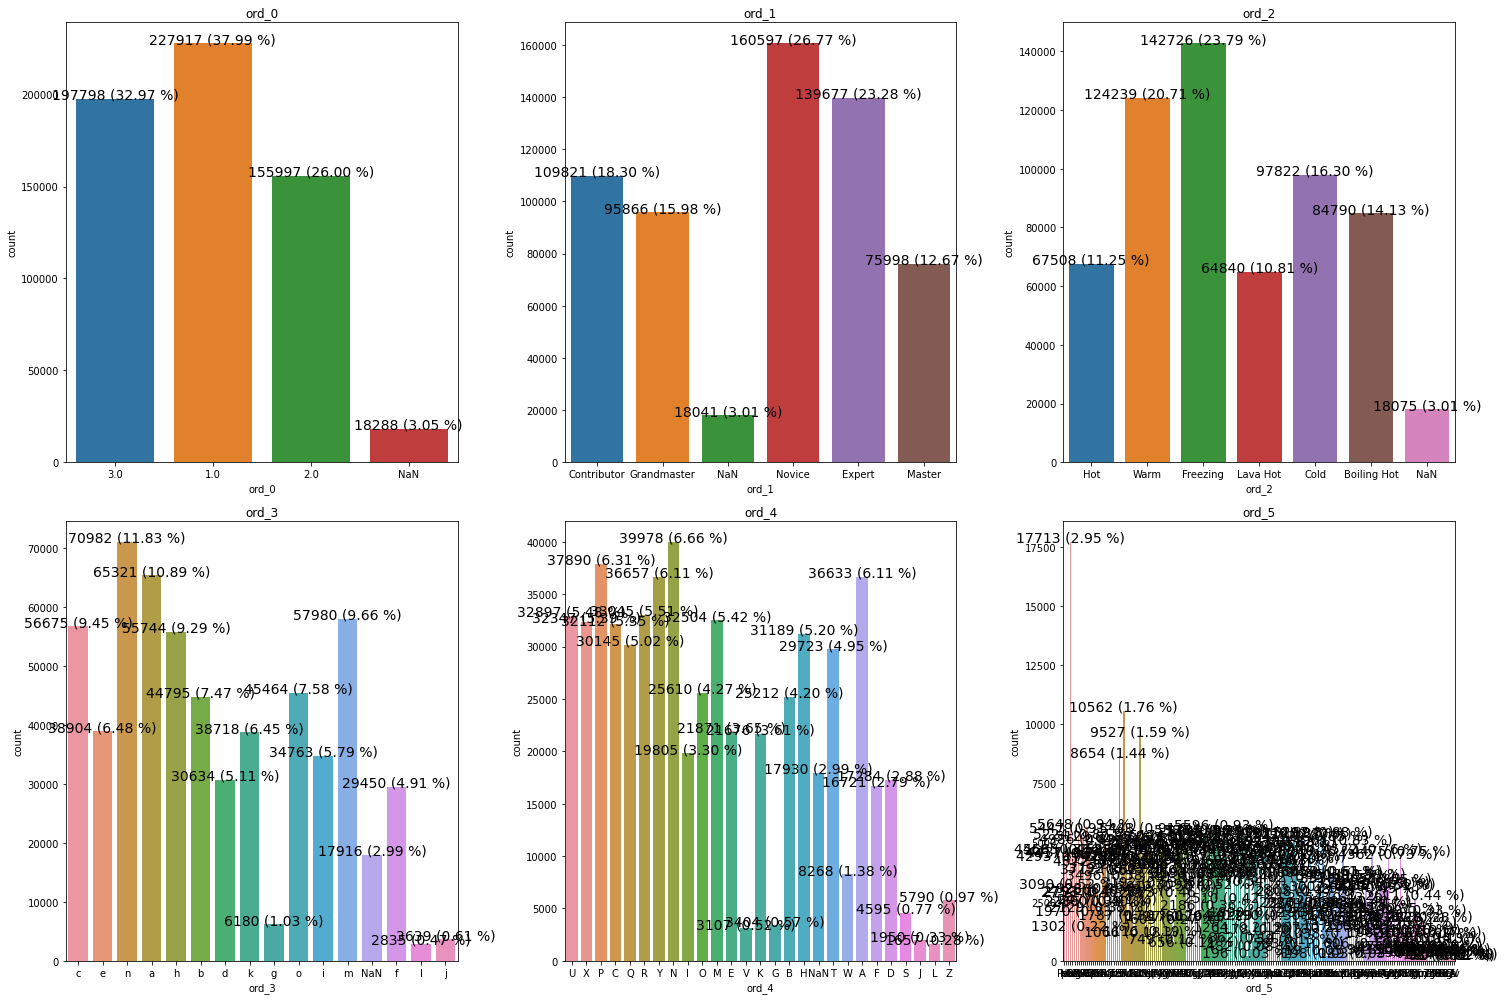

In [148]:
da_func.countplot_cols(train_df, ord_l, ncols=3, dropna=False)

In [7]:
train_df.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
count,600000.000000,582106.000000,581997.000000,582070.000000,581712.000000,582048.000000,582012.000000,600000.000000
mean,299999.500000,0.092301,0.185532,0.278704,1.948224,4.112767,6.371317,0.187205
std,173205.225094,0.289451,0.388729,0.448362,0.853904,2.034430,3.458959,0.390076
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,149999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000
50%,299999.500000,0.000000,0.000000,0.000000,2.000000,5.000000,6.000000,0.000000
75%,449999.250000,0.000000,0.000000,1.000000,3.000000,6.000000,8.000000,0.000000
max,599999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.000000


In [12]:
for c in train_df.columns:
    if 'nom' in c or 'ord' in c:
        print(c)
        print(train_df[c].value_counts(dropna=False))
        print()

nom_0
Red      323286
Blue     205861
Green     52601
NaN       18252
Name: nom_0, dtype: int64

nom_1
Triangle     164190
Polygon      152563
Trapezoid    119438
Circle       104995
Square        26503
NaN           18156
Star          14155
Name: nom_1, dtype: int64

nom_2
Hamster    164897
Axolotl    152319
Lion       119504
Dog        104825
Cat         26276
NaN         18035
Snake       14144
Name: nom_2, dtype: int64

nom_3
India         164869
Costa Rica    151827
Russia        119840
Finland       104601
Canada         26425
NaN            18121
China          14317
Name: nom_3, dtype: int64

nom_4
Theremin    308621
Bassoon     196639
Oboe         49996
Piano        26709
NaN          18035
Name: nom_4, dtype: int64

nom_5
NaN          17778
fc8fc7e56      977
360a16627      972
7917d446c      961
423976253      961
             ...  
7335087fd        5
30019ce8a        3
b3ad70fcb        1
d6bb2181a        1
0385d0739        1
Name: nom_5, Length: 1221, dtype: int64

nom_6
N